# Steady State HTGR PyFLUENT Integration
*This code below installs PyFluent, imports .cas (case) file, hyper-initializes, runs calculation, saves, and displays the temperature profile.*
*Ansys Fluent Version 2024 R2 MUST BE USED. Ran on CAEN computer @ UM*

## Imports for pyfluent, Matplotlib, and os; Ansys Fluent Core Installation

In [1]:
%matplotlib inline
!pip install ansys.fluent.core
import ansys.fluent.core as pyfluent
import os 
import warnings

## Verify Fluent Path

In [2]:
fluent_path = r"C:\Program Files\ANSYS Inc\v242\fluent\ntbin\win64\fluent.exe"
print("Fluent executable found:", os.path.exists(fluent_path))

Fluent executable found: True


## Fluent GUI Launch
To hide GUI, set show_gui = False

In [3]:
warnings.filterwarnings("ignore")
os.environ["AWP_ROOT"] = r"C:\Program Files\ANSYS Inc\v242\fluent\ntbin\win64"
fluent_path = r"C:\Program Files\ANSYS Inc\v242\fluent\ntbin\win64\fluent.exe"

if not os.path.exists(fluent_path):
    raise FileNotFoundError(f"Fluent executable not found at {fluent_path}")

solver = pyfluent.launch_fluent(show_gui = True, mode="solver", fluent_path=fluent_path)
solver.health_check.is_serving

pyfluent.general WARNING: Using 'ui_mode = UIMode.GUI' for 'launch_fluent()' instead of 'show_gui = True'.


True

# Load in .cas File
.cas (case files) contains the entire setup information (the overall mesh, boundary conditions, mesh interfaces, etc.)

In [4]:
#solver.file.read_mesh(file_name = "htgr1.7.msh")
#solver.file.read_mesh(file_name = "htgr_v242file.msh")
#solver.file.read_mesh(file_name = "737.msh")

case_file_path = "1.8.cas.h5" 
solver.file.read(file_type="case", file_name=case_file_path)



#wbpj_file = "Fluent_ONC_12_11_24.wbpj"
#solver.file.read(file_type="wbpj", file_name=wbpj_file)

Fast-loading "C:\PROGRA~1\ANSYSI~1\v242\fluent\fluent24.2.0\\addons\afd\lib\hdfio.bin"
Done.
Multicore processors detected. Processor affinity set!

Reading from caenvdi2024-35:"\\engin-labs.m.storage.umich.edu\engin-labs\home\jacc\windat.v2\Desktop\1.8.cas.h5" in NODE0 mode ...
  Reading mesh ...
       70016 cells,     4 cell zones ...
           1764 hexahedral cells,  zone id: 7
            777 hexahedral cells,  zone id: 8
          36202 tetrahedral cells,  zone id: 6
          31273 tetrahedral cells,  zone id: 9
      150853 faces,    24 face zones ...
              1 mixed wall face ,  zone id: 28
             94 mixed interior faces,  zone id: 16
             70 mixed interior faces,  zone id: 1
           4490 quadrilateral interior faces,  zone id: 3
           2014 quadrilateral interior faces,  zone id: 4
          69917 triangular interior faces,  zone id: 2
          58037 triangular interior faces,  zone id: 5
            588 quadrilateral symmetry faces,  zone id: 13


## Initialize Problem with Hybrid Model
You can use standard initialization as well

In [5]:
solver.solution.initialization.hybrid_initialize()


Initialize using the hybrid initialization method.

Checking case topology... 
-This case has no inlets & no outlets 
-Case will be initialized with constant parameters

Hybrid initialization is done.


## Run calculation with iteration count

In [6]:
solver.solution.run_calculation.iterate(iter_count = 10)


  iter  continuity  x-velocity  y-velocity  z-velocity      energy     time/iter
     1  0.0000e+00  0.0000e+00  5.8440e-02  0.0000e+00  4.5645e-04  0:00:09    9
     2  1.0000e+00  4.4541e-02  1.0641e-01  4.4587e-02  4.9099e-04  0:00:10    8
     3  6.1823e-01  3.9235e-02  5.3765e-02  3.8768e-02  3.0600e-04  0:00:07    7
     4  3.9271e-01  2.8247e-02  4.0583e-02  2.8036e-02  2.6007e-04  0:00:06    6
     5  2.7672e-01  7.1130e-02  9.2215e-02  7.0383e-02  2.4533e-04  0:00:05    5
     6  2.3092e-01  1.0849e-01  1.3800e-01  1.0859e-01  1.9632e-04  0:00:03    4
     7  1.9292e-01  6.8048e-02  8.5695e-02  6.8293e-02  1.7766e-04  0:00:02    3
     8  1.5584e-01  5.2978e-02  6.5879e-02  5.3114e-02  1.5544e-04  0:00:02    2
     9  1.2772e-01  4.4884e-02  5.4658e-02  4.4362e-02  1.4632e-04  0:00:01    1
    10  1.1027e-01  3.7836e-02  4.7079e-02  3.7654e-02  1.3763e-04  0:00:00    0


## Create and Save Temperature Contour Plot

In [7]:
solver.results.graphics.contour.create("temperature-contour-plot")
solver.results.graphics.contour["temperature-contour-plot"](field = "temperature", surfaces_list = ["fff_heated_section", "fff_left_unheated", "fff_opening", "fff_unheated_section", "heated_unheated_interface-contact_region_3-src", "unheated_heated_interface-contact_region_3-trg", "unheated_heated_interface-contact_region_4-trg","symmetry-fff_heated_section","symmetry-fff_left_unheated","symmetry-fff_opening","symmetry-fff_unheated_section","opening_wall","unheated_wall-fff_left_unheated","unheated_wall-fff_unheated_section"])
solver.results.graphics.contour["temperature-contour-plot"].display()
solver.results.graphics.views.auto_scale()
solver.results.graphics.picture.save_picture(file_name = "temperature")


## Display Temperature Plot in Jupyter

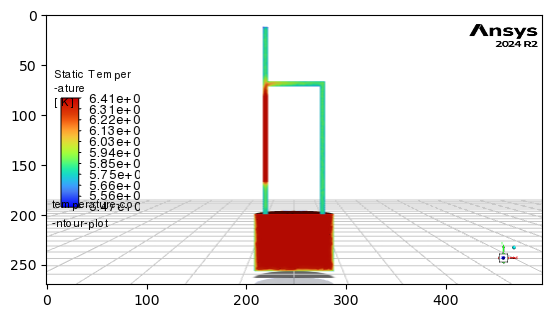

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as image
tempimage = image.imread("temperature.png")
plt.imshow(tempimage)
#plt.axis('off')  
plt.show()

## Exit Ansys Fluent Session

In [ ]:
solver.exit()

## Ignore this from here down

In [ ]:
#solver.setup.materials()

In [ ]:
#viscous = pyfluent.solver.Viscous(settings_source=solver)
#viscous.model = 'laminar'

In [ ]:
#models = pyfluent.solver.Models(settings_source=solver)

In [ ]:
#models.print_state()

In [ ]:
#solver.setup.materials.database.list_materials()

In [ ]:
#solver.setup.materials.database.copy_by_name.argument_names

In [ ]:
#solver.setup.materials.database.copy_by_name(type = 'fluid', name = 'helium')

In [ ]:
#solver.setup.materials.list_materials()

In [ ]:
#solver.setup.cell_zone_conditions.fluid['fff_opening'].material = 'helium'

In [ ]:
#solver.setup.cell_zone_conditions.fluid()  # NOT SURE WHAT PART HAS HELIUM ASK, we can change it easily tho

In [ ]:
#print(dir(solver.file))
    
#solver.setup.boundary_conditions))

In [ ]:
#print(dir(
#solver.setup.boundary_conditions.velocity_inlet()

In [ ]:
#available_surfaces = solver.tui.surface.list_surfaces()
#print(available_surfaces)